<a href="https://colab.research.google.com/github/muskan9887/Digit-Classification-from-scratch/blob/main/Digit_classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementation of Neural Networks and Weight Optimization


In [44]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [45]:
training_data = pd.read_csv('/content/mnist_train.csv')
data = np.array(training_data)
data = data.T
Y_training = data[0, :800] # (1000,)
X_training = data[1:,:800] # (784,1000)
X_training = X_training / 255

Y_test = data[0, 800:1000] # (1000,)
X_test = data[1:,800:1000] # (784,1000)
X_test = X_test / 255

In [46]:
data

array([[5, 0, 4, ..., 5, 6, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
training_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:


def init_params(m):
    W1 = np.random.randn(10, 784)
    b1 = np.random.randn(10, 1)
    W2 = np.random.randn(10, 10)
    b2 = np.random.randn(10, 1)
    return W1, b1, W2, b2



In [49]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return A1, Z1, A2, Z2


In [50]:
def derivative_ReLU(Z):
    return Z > 0

def one_hot_encoding(Y):
    a = np.array(Y)
    num_classes = int(a.max()) + 1  # Convert the maximum value to an integer
    b = np.zeros((a.size, num_classes))
    b[np.arange(a.size), a.astype(int)] = 1  # Convert 'a' to integers using astype(int)
    return b


def backward_propagation(X, Y, W1, A1, Z1, W2, A2):
    m = Y.size
    dZ2 = A2 - one_hot_encoding(Y).T
    db2 = 1/m * np.sum(dZ2)
    dW2 = 1/m * dZ2.dot(A1.T)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    db1 = 1/m * np.sum(dZ1)
    dW1 = 1/m * dZ1.dot(X.T)
    return dW1, db1, dW2, db2


In [51]:
def update_params(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [52]:
def get_accuracy(A2, Y):
    return np.sum(np.argmax(A2, 0) == Y) * 100 / Y.size

def train(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params(Y.size)
    for i in range(iterations):
        A1, Z1, A2, Z2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, A1, Z1, W2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha)
        if i % 100 == 0:
            print("{}/{}: accuracy = {}%".format(i, iterations, get_accuracy(A2, Y)))
    return W1, b1, W2, b2


In [53]:
def make_prediction(X, Y, W1, b1, W2, b2, index):
    _, _, A2, _ = forward_propagation(X, W1, b1, W2, b2)
    output = np.argmax(A2.T[index])
    print("expected:", output)
    print("actual:", Y[index])
    plt.imshow((X.T[index]*255).reshape(28, 28))
    plt.show()



In [54]:
W1, b1, W2, b2 = train(X_training, Y_training, 1500, 0.8)

0/1500: accuracy = 5.25%
100/1500: accuracy = 37.25%
200/1500: accuracy = 52.75%
300/1500: accuracy = 62.25%
400/1500: accuracy = 67.375%
500/1500: accuracy = 67.75%
600/1500: accuracy = 73.5%
700/1500: accuracy = 74.875%
800/1500: accuracy = 76.25%
900/1500: accuracy = 77.25%
1000/1500: accuracy = 80.75%
1100/1500: accuracy = 81.5%
1200/1500: accuracy = 82.0%
1300/1500: accuracy = 82.5%
1400/1500: accuracy = 83.5%


expected: 3
actual: 3


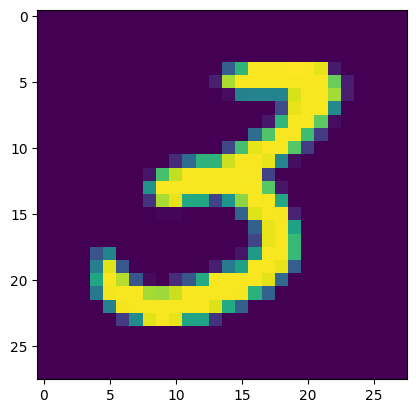

In [55]:
make_prediction(X_test, Y_test, W1, b1, W2, b2, 67)


expected: 6
actual: 6


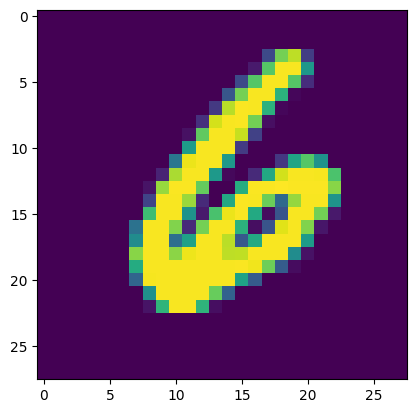

In [56]:
make_prediction(X_test, Y_test, W1, b1, W2, b2,29)


expected: 9
actual: 9


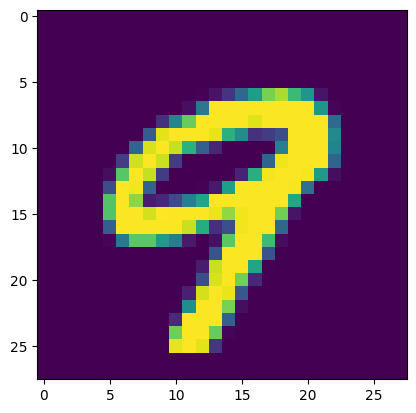

In [57]:
make_prediction(X_test, Y_test, W1, b1, W2, b2, 87)
